In [1]:
import pandas as pd
import numpy as np
import matplotlib as plot

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("GenZ_DatingApp_Data.csv")

In [4]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category')

In [5]:
data['Primary_App'] = data['Primary_App'].fillna(data['Primary_App'].mode()[0])

In [6]:
data['Secondary_Apps'] = data['Secondary_Apps'].fillna(data['Secondary_Apps'].mode()[0])

In [7]:
data['Challenges'] = data['Challenges'].fillna(data['Challenges'].mode()[0])

In [24]:
# Is there gender bias in dating app usage?

usage_by_gender = data.groupby("Gender", observed = False)["Usage_Frequency"].value_counts(normalize=True).unstack()
print(usage_by_gender)

Usage_Frequency     Daily   Monthly    Weekly
Gender                                       
Female           0.357955  0.329545  0.312500
Male             0.415205  0.292398  0.292398
Non-binary       0.307190  0.326797  0.366013


In [23]:
time_by_gender = data.groupby("Gender", observed = False)["Daily_Usage_Time"].value_counts(normalize=True).unstack()
print(time_by_gender)

Daily_Usage_Time    1 hour  1.5 hours   2 hours   3 hours  30 minutes
Gender                                                               
Female            0.227273   0.221591  0.244318  0.193182    0.113636
Male              0.192982   0.204678  0.216374  0.204678    0.181287
Non-binary        0.156863   0.228758  0.156863  0.215686    0.241830


In [22]:
app_preference_by_gender = data.groupby("Gender", observed = False)["Primary_App"].value_counts(normalize=True).unstack()
print(app_preference_by_gender)

Primary_App    Bumble     Hinge   OkCupid    Tinder
Gender                                             
Female       0.221591  0.198864  0.448864  0.130682
Male         0.169591  0.169591  0.497076  0.163743
Non-binary   0.163399  0.274510  0.398693  0.163399


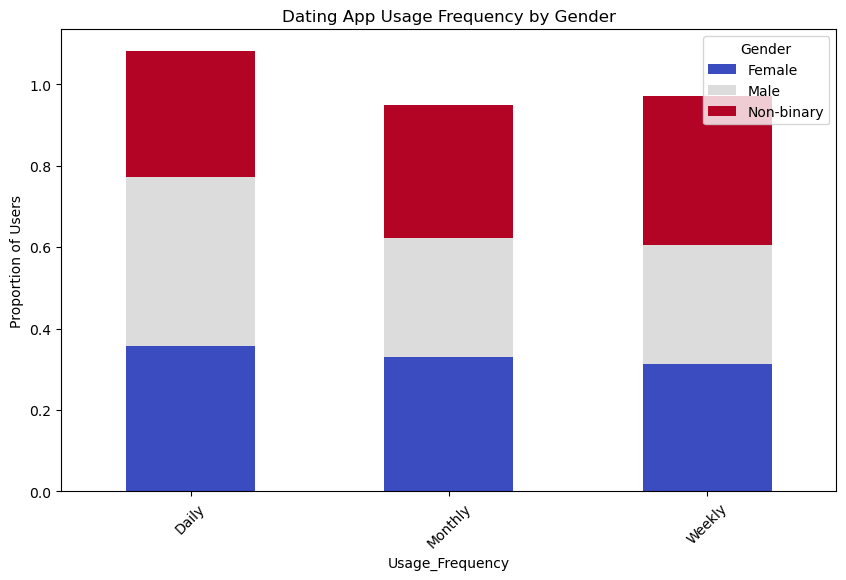

In [25]:
import matplotlib.pyplot as plt

usage_by_gender.T.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.ylabel("Proportion of Users")
plt.title("Dating App Usage Frequency by Gender")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()

In [28]:
from scipy.stats import chi2_contingency

contingency_table = data.pivot_table(index="Gender", observed = False, columns="Usage_Frequency", aggfunc="size", fill_value=0)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant gender bias in dating app usage.")
else:
    print("No significant gender bias detected.")

Chi-Square Test Statistic: 4.510084394911004
P-value: 0.3413534057092455
No significant gender bias detected.


<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

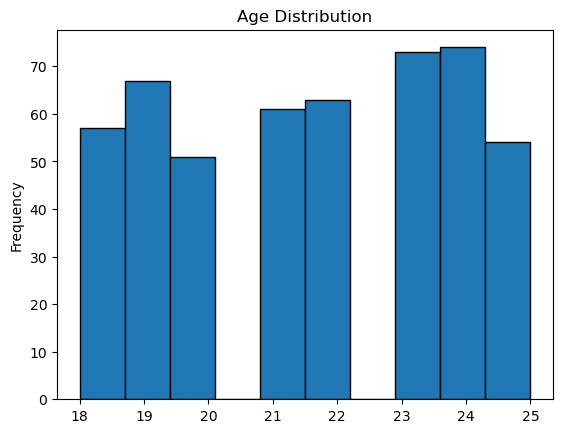

In [36]:
# Is there a missing group of users that should have been included?
data["Age"].plot(kind="hist", bins=10, edgecolor="black", title="Age Distribution")

In [39]:
demographic_counts = {
    'Gender': data['Gender'].value_counts(),
    'Location': data['Location'].value_counts(),
    'Age Group': pd.cut(data['Age'], [18, 22, 26, 30, 35, 40]).value_counts()
}

In [40]:
demographic_counts

{'Gender': Gender
 Female        176
 Male          171
 Non-binary    153
 Name: count, dtype: int64,
 'Location': Location
 Mumbai       82
 Delhi        76
 Kolkata      76
 Bangalore    69
 Pune         67
 Chennai      66
 Hyderabad    64
 Name: count, dtype: int64,
 'Age Group': Age
 (18, 22]    242
 (22, 26]    201
 (26, 30]      0
 (30, 35]      0
 (35, 40]      0
 Name: count, dtype: int64}

In [ ]:
# Can we trust this dataset for making general claims about Gen-Z dating in India?

